<a href="https://colab.research.google.com/github/AlkaAttri/Data-Visualization/blob/main/Netflix_Project/Netflix_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix Data Visualization Project for beginners

In [93]:
#include all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Read the dataset
# dataset is downloaded from Kaggle
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Visualisation Project/netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [95]:
#check for null values
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [96]:
#size of data frame
df.shape

(8807, 12)

In [97]:
#handling NaN values
df['director']=df['director'].fillna('Not Available')
df['cast']=df['cast'].fillna('Not Available')
df['country']=df['country'].fillna('Not Available')
df['rating']=df['rating'].fillna('Not Available')


In [98]:
#removing duplicate values
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(8807, 12)

In [99]:
#deleting some rows conating Nan values
df=df.dropna(subset=['date_added','duration'])
df.shape

(8794, 12)

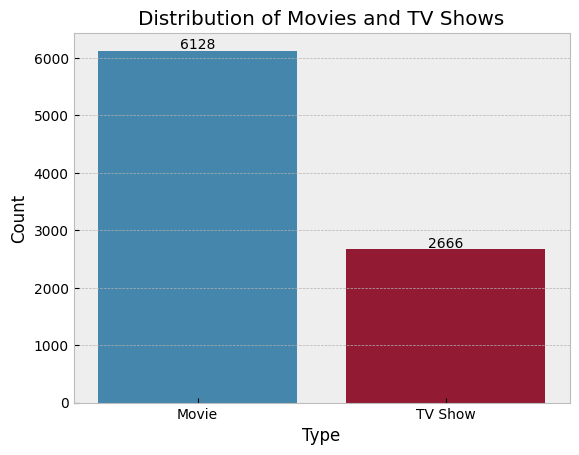

In [100]:
# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ax=sns.countplot(data=df,x='type',hue='type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Movies and TV Shows')
# Adding labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X-coordinate (center of the bar)
            p.get_height() + 30.5,           # Y-coordinate (slightly above the bar)
            int(p.get_height()),            # Label text (the count value)
            ha='center')                    # Horizontal alignment
plt.show()

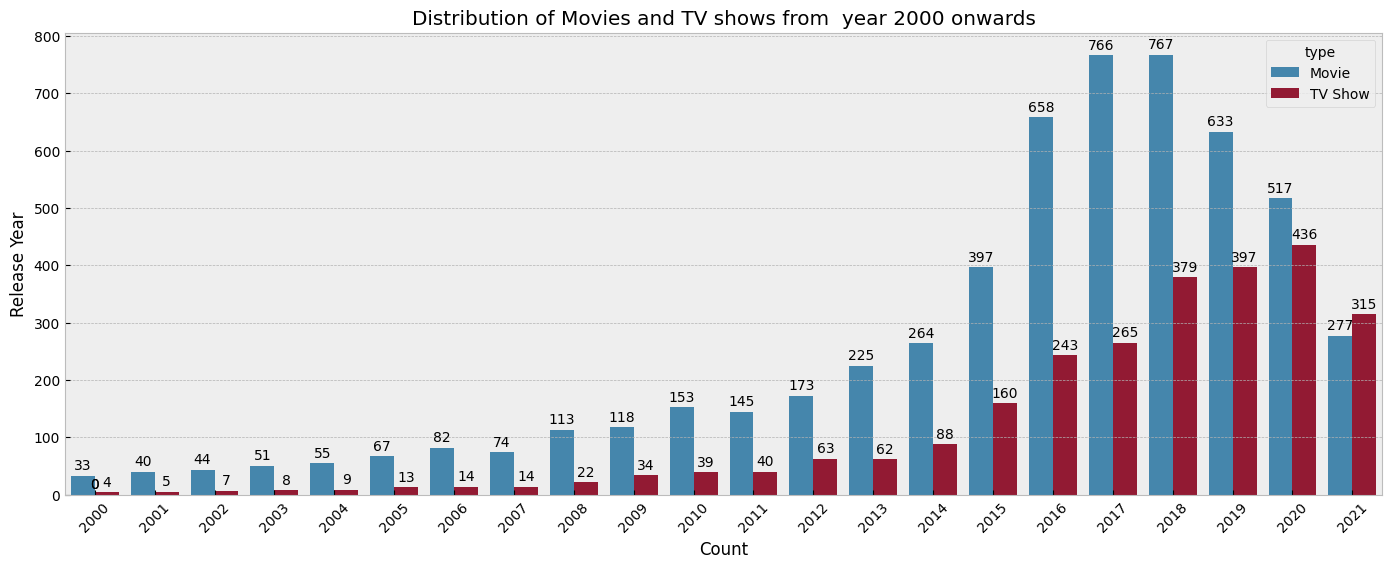

In [101]:
# Year-wise no of movie released from 2000 to 2024
df_year=df.query('release_year>=2000')
plt.style.use('bmh')
# Change the figure size before plotting
plt.figure(figsize=(17, 6))  # (width, height) in inches
ax=sns.countplot(data=df_year,x='release_year',hue='type')

plt.xlabel('Count')
plt.ylabel('Release Year')
# Rotating the x-ticks by 45 degrees
plt.xticks(rotation=45)
plt.title('Distribution of Movies and TV shows from  year 2000 onwards')
for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,p.get_height()+10.5,int(p.get_height()),ha='center')

plt.show()

In [102]:
#Top 10 Countries with highest Movie released till now
df_countries_high_count_movies=df.query('type=="Movie"')
df_countries_high_count_movies=df_countries_high_count_movies['country'].value_counts()

df_countries_high_count_movies=df_countries_high_count_movies.sort_values(ascending=False).head(10)
df_countries_high_count_movies=df_countries_high_count_movies.reset_index()

df_countries_high_count_movies



,country,count
0,United States,2055
1,India,893
2,Not Available,440
3,United Kingdom,206
4,Canada,122
5,Spain,97
6,Egypt,92
7,Nigeria,86
8,Indonesia,77
9,Turkey,76


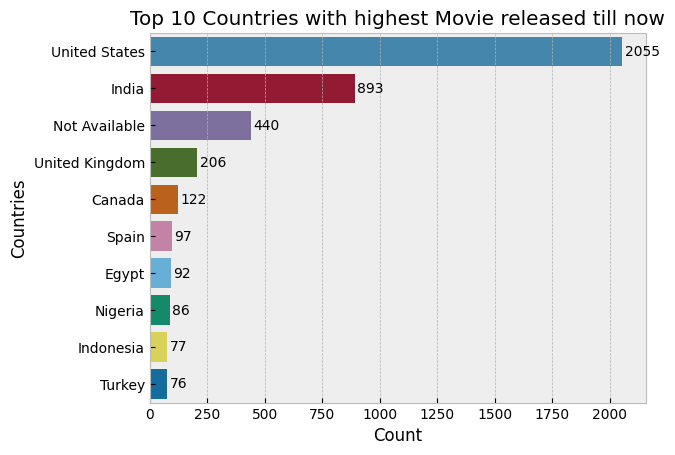

In [103]:
#Bar chart shows "Top 10 Countries with highest Movie released till now"
ax=sns.barplot(data=df_countries_high_count_movies,x= 'count',y='country',hue='country')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.title('Top 10 Countries with highest Movie released till now')
for p in ax.patches:
  ax.text(p.get_width()+10.5,p.get_y()+p.get_height()/2,int(p.get_width()),va='center')
plt.show()

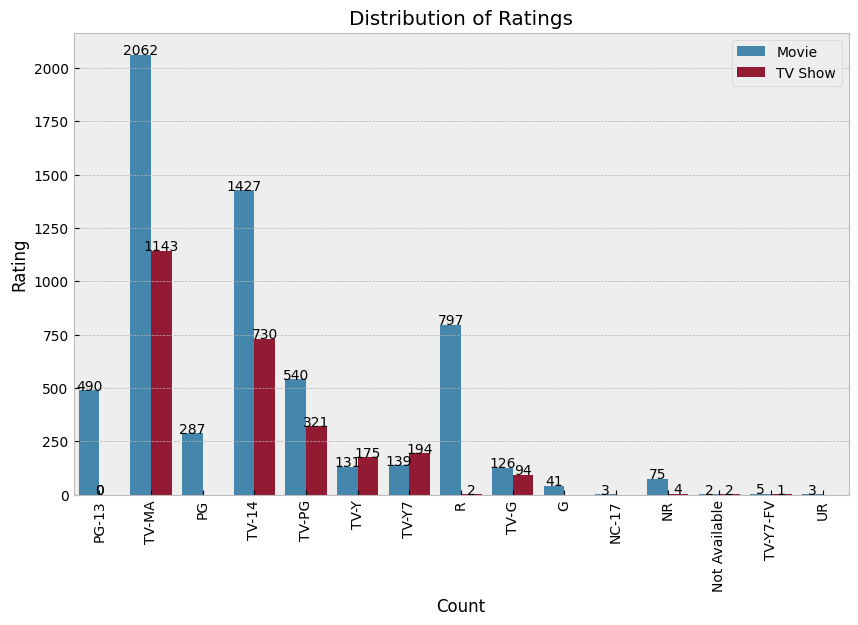

In [104]:
# plotting the graph showing distribution of ratings for Movies and TV shows
df['rating'].unique()
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,x='rating',hue='type')
plt.legend(loc='lower right')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.title('Distribution of Ratings')
plt.legend(loc='upper right')
# Adding labels to each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X-coordinate (center of the bar)
            p.get_height() + 0.5,           # Y-coordinate (slightly above the bar)
            int(p.get_height()),            # Label text (the count value)
            ha='center')                    # Horizontal alignment
plt.show()

In [107]:
df['listed_in'].unique()
#df.head(5)

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [108]:
df.query('listed_in == "Horror Movies"') # return only those rows listed in "Horror Movies"

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
229,s230,Movie,The Old Ways,Christopher Alender,"Brigitte Kali Canales, Andrea Cortes, Julia Ve...",United States,"August 25, 2021",2020,TV-MA,90 min,Horror Movies,A reporter visits her birthplace in Veracruz f...
307,s308,Movie,Aftermath,Peter Winther,"Ashley Greene, Shawn Ashmore, Sharif Atkins, B...",United States,"August 4, 2021",2021,TV-MA,115 min,Horror Movies,"Desperate to save their marriage, a young coup..."
353,s354,Movie,The Haunting in Connecticut 2: Ghosts of Georgia,Tom Elkins,"Abigail Spencer, Chad Michael Murray, Katee Sa...",United States,"August 1, 2021",2013,R,101 min,Horror Movies,A couple's Georgia dream home becomes a living...
479,s480,Movie,Fear Street Part 2: 1978,Leigh Janiak,"Sadie Sink, Emily Rudd, Ryan Simpkins, McCabe ...",Not Available,"July 9, 2021",2021,R,111 min,Horror Movies,"In the cursed town of Shadyside, a killer's mu..."
586,s587,Movie,Pet Sematary 2,Mary Lambert,"Edward Furlong, Anthony Edwards, Clancy Brown,...",Not Available,"July 1, 2021",1992,R,101 min,Horror Movies,"When Chase and his son, Jeff, move to a differ..."
643,s644,Movie,The Seventh Day,Justin P. Lange,"Guy Pearce, Vadhir Derbez, Stephen Lang, Brady...",United States,"June 24, 2021",2021,R,87 min,Horror Movies,An inexperienced priest teams up with a harden...
728,s729,Movie,The Devil Below,Bradley Parker,"Alicia Sanz, Will Patton, Jonathan Sadowski, A...",United States,"June 13, 2021",2021,TV-MA,89 min,Horror Movies,When a team of researchers tries to find out w...
822,s823,Movie,The Wind,Emma Tammi,"Caitlin Gerard, Julia Goldani Telles, Ashley Z...",United States,"June 2, 2021",2019,R,88 min,Horror Movies,Isolated on a wind-ravaged 19th-century homest...
962,s963,Movie,The Strangers: Prey at Night,Johannes Roberts,"Bailee Madison, Martin Henderson, Emma Bellomy...","United States, United Kingdom","April 30, 2021",2018,R,85 min,Horror Movies,Home-invasion horror comes to the trailer park...
1284,s1285,Movie,The Conjuring 2,James Wan,"Patrick Wilson, Vera Farmiga, Madison Wolfe, F...","Canada, United States, United Kingdom","February 21, 2021",2016,R,134 min,Horror Movies,After her daughter unwittingly releases a male...


In [109]:
df.query('listed_in == "Dramas, Horror Movies, Thrillers"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
42,s43,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,"September 16, 2021",1978,PG,116 min,"Dramas, Horror Movies, Thrillers",Four years after the last deadly shark attacks...


In [114]:
# rteun all rows containing Horror Movies
df_listed_in_filter=df['listed_in'].str.contains(r'\bHorror Movies\b',case=False)
df_listed_in=df[df_listed_in_filter]
df_listed_in


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
42,s43,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,"September 16, 2021",1978,PG,116 min,"Dramas, Horror Movies, Thrillers",Four years after the last deadly shark attacks...
43,s44,Movie,Jaws 3,Joe Alves,"Dennis Quaid, Bess Armstrong, Simon MacCorkind...",United States,"September 16, 2021",1983,PG,98 min,"Action & Adventure, Horror Movies, Thrillers",After the staff of a marine theme park try to ...
44,s45,Movie,Jaws: The Revenge,Joseph Sargent,"Lorraine Gary, Lance Guest, Mario Van Peebles,...",United States,"September 16, 2021",1987,PG-13,91 min,"Action & Adventure, Horror Movies, Thrillers","After another deadly shark attack, Ellen Brody..."
200,s201,Movie,Krishna Cottage,Santram Varma,"Sohail Khan, Isha Koppikar, Natassha, Rati Agn...",India,"August 27, 2021",2004,TV-14,124 min,"Action & Adventure, Horror Movies, Internation...",True love is put to the test when another woma...
...,...,...,...,...,...,...,...,...,...,...,...,...
8722,s8723,Movie,What Lies Beneath,Robert Zemeckis,"Harrison Ford, Michelle Pfeiffer, Diana Scarwi...",United States,"January 1, 2020",2000,PG-13,130 min,"Horror Movies, Thrillers",When Claire Spencer starts hearing ghostly voi...
8760,s8761,Movie,Would You Rather,David Guy Levy,"Brittany Snow, Jeffrey Combs, Jonny Coyne, Law...",United States,"June 5, 2019",2013,TV-MA,93 min,"Horror Movies, Independent Movies, Thrillers","In need of cash to help her sick brother, a yo..."
8765,s8766,Movie,XX,"Jovanka Vuckovic, Annie Clark, Roxanne Benjami...","Natalie Brown, Jonathan Watton, Melanie Lynske...","Canada, United States","June 22, 2017",2017,R,81 min,Horror Movies,This four-part anthology of short horror films...
8782,s8783,Movie,Yoga Hosers,Kevin Smith,"Harley Quinn Smith, Lily-Rose Depp, Johnny Dep...",United States,"December 2, 2016",2016,PG-13,88 min,"Comedies, Horror Movies, Independent Movies",With an all-important high school party at sta...


In [115]:
df_listed_in.shape

(357, 12)

In [122]:
# top 10 countries watching Horror Movies
df_listed_in_top=df_listed_in['country'].value_counts().sort_values(ascending=False)

df_listed_in_top=df_listed_in_top.reset_index()
df_listed_in_top=df_listed_in_top.head(10)
df_listed_in_top



,country,count
0,United States,143
1,India,32
2,Not Available,17
3,Thailand,12
4,Indonesia,10
5,"United States, Canada",10
6,United Kingdom,9
7,Canada,7
8,"Canada, United States",6
9,South Korea,4


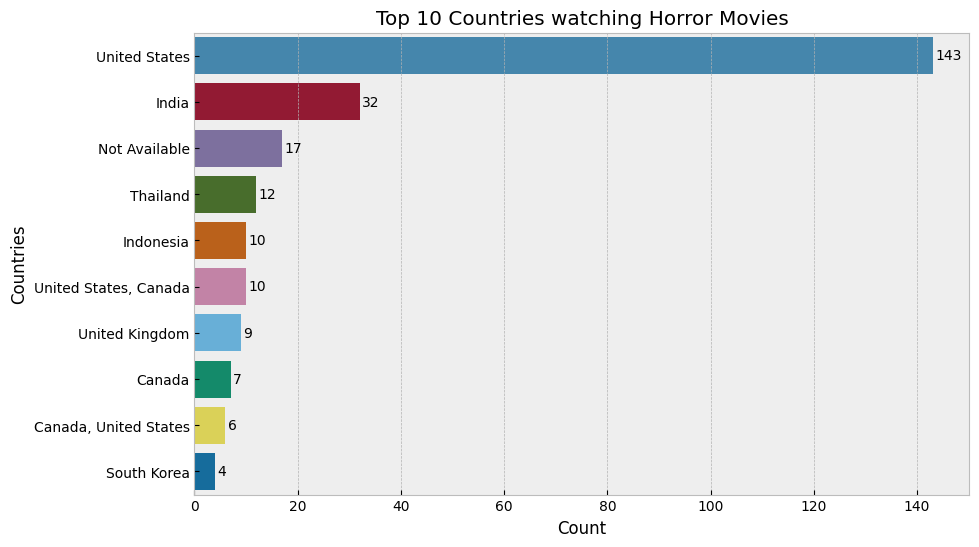

In [128]:
#Top 10 Countries watching Horror Movies
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df_listed_in_top,y='country',x='count',hue='country')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.title('Top 10 Countries watching Horror Movies')
for p in ax.patches:
  plt.text(p.get_width()+.5,p.get_y()+p.get_height()/2,int(p.get_width()),va='center')
plt.show()